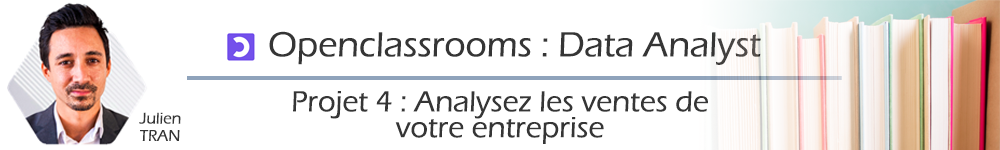

### Mission 2 : Ensuite, vous réaliserez l’analyse des données. Une grande liberté vous est laissée sur ce plan, mais à vous de trouver les informations qui ont du sens pour mieux comprendre les ventes.

Vous devrez y utiliser au moins :

des indicateurs de tendance centrale et de dispersion ;
une analyse de concentration, via une courbe de Lorenz et un indice de Gini ;
des représentations graphiques, dont au moins un histogramme, une représentation avec des "boîtes à moustaches", et une représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates) ;
des analyses bivariées.

### Sommaire //Mission 2 📚

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Nettoyage des différentes tables](#3)
    * [3.1.customers](#3.1)
        * [3.1.1.Valeurs manquantes, nulles et NA](#3.1.1)
        * [3.1.2.Doublons](#3.1.2)
        * [3.1.3.Outliers, valeurs abberantes et atypiques](#3.1.3)
    * [3.2.products](#3.2)
        * [3.2.1.Valeurs manquantes, nulles et NA](#3.2.1)
        * [3.2.2.Doublons](#3.2.2)
        * [3.2.3.Outliers, valeurs abberantes et atypiques](#3.1.3)
    * [3.3.transactions](#3.3)
        * [3.3.1.Valeurs manquantes, nulles et NA](#3.3.1)
        * [3.3.2.Doublons](#3.3.2)
        * [3.3.3.Outliers, valeurs abberantes et atypiques](#3.1.3)
        * [3.3.4.Formatage des dates en mois](#3.1.4)
    * [3.4.Jointure des tables products et transactions (left)](#3.4)
    * [3.5.Jointure des tables customers et transactions (left)](#3.5)
    * [3.6.Jointure des tables customers et products_transactions](#3.6)
        * [3.6.1.Valeurs manquantes, nulles et NA](#3.6.1)
        * [3.6.2.Doublons](#3.6.2)
        * [3.6.3.Outliers, valeurs abberantes et atypiques](#3.6.3)
        * [3.6.4.Conversion de la colonne birth en age](#3.6.4)
        * [3.6.5.Création d'une colonne tranches d'ages](#3.6.5)
* [4.Analyse des données](#4)
    * [4.1.Indicateurs de tendance centrale et de dispersion](#4.1)
    * [4.2.Analyse de concentrentation](#4.2)
    * [4.3.Evolution du CA par mois](#4.3)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#j'importe les librairies qui vont me servir plus tard

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#Je definis le nombre de lignes max affichées sur 100

pd.set_option("max_rows", None) 
pd.set_option("display.precision",3)

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [2]:
#Je charge tous les fichiers csv

customers = pd.read_csv("C:/Users/33643/Desktop/P4/CSV P4/customers.csv")
products = pd.read_csv("C:/Users/33643/Desktop/P4/CSV P4/products.csv")
transactions = pd.read_csv("C:/Users/33643/Desktop/P4/CSV P4/transactions.csv")

#J'affiche une phrase si l'import est reussi

print("Fichiers chargés avec succes!")

Fichiers chargés avec succes!


## 3.Nettoyage des différentes tables <a class="anchor" id="3"></a>

## 3.1.customers <a class="anchor" id="3.1"></a>

In [3]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
customers['client_id'].count()

8623

In [5]:
customers.describe()

,birth
count,8623.000
mean,1978.281
std,16.920
min,1929.000
25%,1966.000
50%,1979.000
75%,1992.000
max,2004.000


## 3.1.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.1.1"></a>

In [6]:
print(customers.isnull().values.any())

False


## 3.1.2.Doublons <a class="anchor" id="3.1.2"></a>

In [7]:
print(customers.duplicated().values.any())

False


## 3.1.3.Outliers, valeurs abberantes et atypiques <a class="anchor" id="3.1.3"></a>

In [8]:
# Je supprime les valeurs tests detecté lors de la verification des doublons de la tables transactions
customers = customers[~customers.client_id.str.contains("ct")]

## 3.2.products <a class="anchor" id="3.2"></a>

In [9]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [10]:
products.describe()

,price,categ
count,3287.000,3287.000
mean,21.857,0.370
std,29.848,0.615
min,-1.000,0.000
25%,6.990,0.000
50%,13.060,0.000
75%,22.990,1.000
max,300.000,2.000


## 3.2.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.2.1"></a>

In [11]:
print(products.isnull().values.any())

False


## 3.2.2.Doublons <a class="anchor" id="3.2.2"></a>

In [12]:
print(products.duplicated().values.any())

False


## 3.2.3.Outliers, valeurs abberantes et atypiques <a class="anchor" id="3.2.3"></a>

In [13]:
# Je supprime les valeurs tests detecté lors de la verification des doublons de la tables transactions
products = products[~products.id_prod.str.contains("T")]

## 3.3.transactions <a class="anchor" id="3.3"></a>

In [14]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [15]:
transactions.describe()

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


## 3.3.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.3.1"></a>

In [16]:
print(transactions.isnull().values.any())

False


## 3.3.2.Doublons <a class="anchor" id="3.3.2"></a>

In [17]:
print(transactions.duplicated().values.any())
print(transactions.duplicated().sum())

#je check à la main cest 126 lignes

transactions.loc[transactions.duplicated(), :]

True
126


,id_prod,date,session_id,client_id
34387,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0
54813,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
57261,T_0,test_2021-03-01 02:30:02.237439,s_0,ct_1
58802,T_0,test_2021-03-01 02:30:02.237429,s_0,ct_0
60170,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
62365,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
71097,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
72405,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1
75176,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
76735,T_0,test_2021-03-01 02:30:02.237442,s_0,ct_0


### Je supprime les doublons de la table transactions

In [18]:
transactions = transactions.drop_duplicates()

print(transactions.duplicated().values.any())

False


## 3.3.3.Outliers, valeurs abberantes et atypiques <a class="anchor" id="3.3.3"></a>

In [19]:
transactions = transactions[~transactions.date.str.contains("test")]

## 3.3.4.formatage des dates en mois <a class="anchor" id="3.3.4"></a>

In [20]:
transactions.date=pd.to_datetime(transactions.date)
transactions.date=transactions.date.dt.strftime('%Y-%m')

transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04,s_18746,c_4450
1,2_226,2022-02,s_159142,c_277
2,1_374,2021-09,s_94290,c_4270
3,0_2186,2021-10,s_105936,c_4597
4,0_1351,2021-07,s_63642,c_1242


## 3.4.Jointure des tables products et transactions (left) <a class="anchor" id="3.4"></a>

In [21]:
#j'ajoute une colonne pour indiquer quelle ligne provient de quelle table
products_transactions = transactions.merge(products.drop_duplicates(), on='id_prod', how='left', indicator=True)
products_transactions.head()

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1483,2021-04,s_18746,c_4450,4.99,0.0,both
1,2_226,2022-02,s_159142,c_277,65.75,2.0,both
2,1_374,2021-09,s_94290,c_4270,10.71,1.0,both
3,0_2186,2021-10,s_105936,c_4597,4.20,0.0,both
4,0_1351,2021-07,s_63642,c_1242,8.99,0.0,both


### Affichage des lignes trouvées uniquement dans la table transactions

In [22]:
products_transactions_left = products_transactions.loc[(products_transactions['_merge'] == 'left_only')]
products_transactions_left.head()

,id_prod,date,session_id,client_id,price,categ,_merge
6231,0_2245,2021-06,s_49705,c_1533,NaN,NaN,left_only
10797,0_2245,2021-06,s_49323,c_7954,NaN,NaN,left_only
14045,0_2245,2021-11,s_124474,c_5120,NaN,NaN,left_only
17480,0_2245,2022-02,s_172304,c_4964,NaN,NaN,left_only
21071,0_2245,2021-03,s_3,c_580,NaN,NaN,left_only


### Remplacement des valeurs manquantes dans la colonne price en utilisant la moyenne

In [23]:
mean = products_transactions['price'].mean()
products_transactions['price'].fillna(mean, inplace=True)

### Remplacement des valeurs manquantes dans la colonne catégorie par 0

In [24]:
products_transactions['categ'].fillna(0, inplace=True)

products_transactions_left = products_transactions.loc[(products_transactions['_merge'] == 'left_only')]
products_transactions_left.head()

,id_prod,date,session_id,client_id,price,categ,_merge
6231,0_2245,2021-06,s_49705,c_1533,17.215,0.0,left_only
10797,0_2245,2021-06,s_49323,c_7954,17.215,0.0,left_only
14045,0_2245,2021-11,s_124474,c_5120,17.215,0.0,left_only
17480,0_2245,2022-02,s_172304,c_4964,17.215,0.0,left_only
21071,0_2245,2021-03,s_3,c_580,17.215,0.0,left_only


## 3.5.Jointure des tables customers et transactions (left) <a class="anchor" id="3.5"></a>

In [25]:
#j'ajoute une colonne pour indiquer quelle ligne provient de quelle table
customers_transactions = transactions.merge(customers.drop_duplicates(), on='client_id', how='right', indicator=True)
customers_transactions.head()

,id_prod,date,session_id,client_id,sex,birth,_merge
0,0_1455,2021-03,s_9942,c_4410,f,1967,both
1,0_1376,2021-09,s_94984,c_4410,f,1967,both
2,1_312,2022-01,s_156960,c_4410,f,1967,both
3,1_653,2021-07,s_68860,c_4410,f,1967,both
4,0_1110,2021-11,s_114715,c_4410,f,1967,both


### Affichage des lignes trouvées uniquement dans la table customers

In [26]:
customers_indecis = customers_transactions.loc[(customers_transactions['_merge'] == 'right_only')]
customers_indecis

,id_prod,date,session_id,client_id,sex,birth,_merge
29516,NaN,NaN,NaN,c_8253,f,2001,right_only
99355,NaN,NaN,NaN,c_3789,f,1997,right_only
108189,NaN,NaN,NaN,c_4406,f,1998,right_only
109296,NaN,NaN,NaN,c_2706,f,1967,right_only
111918,NaN,NaN,NaN,c_3443,m,1959,right_only
123281,NaN,NaN,NaN,c_4447,m,1956,right_only
123535,NaN,NaN,NaN,c_3017,f,1992,right_only
129492,NaN,NaN,NaN,c_4086,f,1992,right_only
155401,NaN,NaN,NaN,c_6930,m,2004,right_only
158642,NaN,NaN,NaN,c_4358,m,1999,right_only


## 3.6.Jointure des tables customers et products_transactions <a class="anchor" id="3.6"></a>

In [27]:
customers_transactions_products = pd.merge(customers, products_transactions, on= 'client_id')
customers_transactions_products.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
0,c_4410,f,1967,0_1455,2021-03,s_9942,8.99,0.0,both
1,c_4410,f,1967,0_1376,2021-09,s_94984,16.24,0.0,both
2,c_4410,f,1967,1_312,2022-01,s_156960,24.56,1.0,both
3,c_4410,f,1967,1_653,2021-07,s_68860,25.99,1.0,both
4,c_4410,f,1967,0_1110,2021-11,s_114715,4.71,0.0,both


## 3.6.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.6.1"></a>

In [28]:
print(customers_transactions_products.isnull().values.any())

False


## 3.6.2.Doublons <a class="anchor" id="3.6.2"></a>

In [29]:
print(customers_transactions_products.duplicated().values.any())
print(customers_transactions_products.duplicated().sum())

#Il s'agit de la colonne merge ou both figure pour toutes les lignes

True
408


## 3.6.3.Outliers, valeurs abberantes et atypiques <a class="anchor" id="3.6.3"></a>

### Aggregation de la derniere table par client_id

In [30]:
customers_transactions_products2 = customers_transactions_products.groupby('client_id').sum()

customers_transactions_products2.head()

,birth,price,categ
client_id,,,
c_1,39100,300.65,6.0
c_10,54768,586.18,19.0
c_100,11952,222.87,5.0
c_1000,110096,980.02,36.0
c_1001,114956,1102.45,16.0


### Ordonnancement de la table pour afficher les plus gros clients

In [31]:
customers_transactions_products_sorted = customers_transactions_products.sort_values(by = [('client_id')], ascending = False).dropna(axis=0)

customers_transactions_products_sorted.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
288551,c_999,m,1964,0_1442,2021-08,s_81831,4.89,0.0,both
288543,c_999,m,1964,1_669,2022-01,s_150872,15.99,1.0,both
288533,c_999,m,1964,1_459,2021-09,s_88239,15.99,1.0,both
288534,c_999,m,1964,1_724,2022-01,s_152063,16.94,1.0,both
288535,c_999,m,1964,0_1385,2021-10,s_98289,11.99,0.0,both


Les 4 premiers clients représentent en réalité des client BtoB et non BtoC comme le reste des clients, je décide donc de supprimer ces 4 clients de ma table pour ne pas fausser les résultats de mes analyses

### Apercu des achats des 4 plus gros clients BtoB

In [32]:
customers_transactions_products_btob1 = customers_transactions_products_sorted.loc[(customers_transactions_products_sorted['client_id'] == 'c_1609')] 
                                                                                  
customers_transactions_products_btob2 = customers_transactions_products_sorted.loc[(customers_transactions_products_sorted['client_id'] == 'c_4958')]

customers_transactions_products_btob3 = customers_transactions_products_sorted.loc[(customers_transactions_products_sorted['client_id'] == 'c_6714')] 

customers_transactions_products_btob4 = customers_transactions_products_sorted.loc[(customers_transactions_products_sorted['client_id'] == 'c_3454')] 

customers_transactions_products_btob1.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
144834,c_1609,m,1980,0_1065,2021-10,s_101959,15.99,0.0,both
145904,c_1609,m,1980,0_2199,2021-09,s_90842,12.99,0.0,both
145905,c_1609,m,1980,0_1059,2021-06,s_46637,18.99,0.0,both
145897,c_1609,m,1980,0_1447,2021-04,s_25140,4.99,0.0,both
149174,c_1609,m,1980,0_1443,2022-02,s_165047,5.99,0.0,both


In [33]:
X = 'client_id'
Y = 'categ'

contx = customers_transactions_products_btob1[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contx

categ,0.0,1.0,2.0,Total
client_id,,,,
c_1609,10286,2568,1,12855
Total,10286,2568,1,12855


In [34]:
X = 'client_id'
Y = 'categ'

contx = customers_transactions_products_btob2[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contx

categ,0.0,1.0,2.0,Total
client_id,,,,
c_4958,3,910,1649,2562
Total,3,910,1649,2562


In [35]:
X = 'client_id'
Y = 'categ'

contx = customers_transactions_products_btob3[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contx

categ,0.0,1.0,2.0,Total
client_id,,,,
c_6714,2640,1695,138,4473
Total,2640,1695,138,4473


In [36]:
X = 'client_id'
Y = 'categ'

contx = customers_transactions_products_btob4[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contx

categ,0.0,1.0,2.0,Total
client_id,,,,
c_3454,1330,1937,8,3275
Total,1330,1937,8,3275


### Les 4 premiers clients représentent en réalité des client BtoB et non BtoC comme le reste des clients, je décide de garder ces 4 clients de ma table et observer les résultats

## 3.6.4.Conversion la colonne birth en age <a class="anchor" id="3.6.4"></a>

In [37]:
customers_transactions_products['birth'] = 2022 - customers_transactions_products['birth']

customers_transactions_products.rename(columns={'birth': 'age'}, inplace = True)

customers_transactions_products.head()

,client_id,sex,age,id_prod,date,session_id,price,categ,_merge
0,c_4410,f,55,0_1455,2021-03,s_9942,8.99,0.0,both
1,c_4410,f,55,0_1376,2021-09,s_94984,16.24,0.0,both
2,c_4410,f,55,1_312,2022-01,s_156960,24.56,1.0,both
3,c_4410,f,55,1_653,2021-07,s_68860,25.99,1.0,both
4,c_4410,f,55,0_1110,2021-11,s_114715,4.71,0.0,both


## 3.6.5.Création d'une colonne tranches d'ages <a class="anchor" id="3.6.5"></a>

In [38]:
bin_labels=labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']

customers_transactions_products['tranche_age'] = pd.cut(x=customers_transactions_products['age'], bins=[10,20,30,40,50,60,70,80,90,100],labels=bin_labels)

customers_transactions_products = customers_transactions_products[['client_id', 'sex', 'age', 'tranche_age', 'id_prod','date','session_id', 'price','categ', '_merge']]

customers_transactions_products.head()

,client_id,sex,age,tranche_age,id_prod,date,session_id,price,categ,_merge
0,c_4410,f,55,51-60,0_1455,2021-03,s_9942,8.99,0.0,both
1,c_4410,f,55,51-60,0_1376,2021-09,s_94984,16.24,0.0,both
2,c_4410,f,55,51-60,1_312,2022-01,s_156960,24.56,1.0,both
3,c_4410,f,55,51-60,1_653,2021-07,s_68860,25.99,1.0,both
4,c_4410,f,55,51-60,0_1110,2021-11,s_114715,4.71,0.0,both


## 4.Analyse des données <a class="anchor" id="4"></a>

## 4.1.Indicateurs de tendance centrale et de dispersion <a class="anchor" id="4.1"></a>

--------------------------------------------------
Produits de catégorie 0
moyenne:
 10.650057101486876
medianne:
 9.99
mode:
 0    4.99
dtype: float64
nbr elements:
 209529
var:
 24.314327558189625
ect:
 4.930956049103422
coeff de variation :
 0.4629980855609686
skw:
 0.42526249508404707
kur:
 -0.3765649606700978


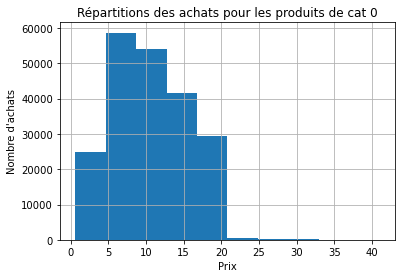

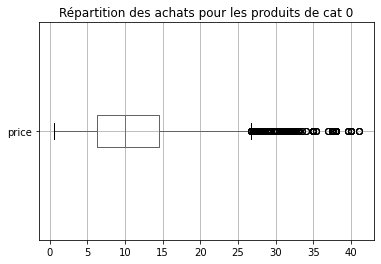

In [39]:
subset_0 = customers_transactions_products[customers_transactions_products.categ == 0.0] # Création du sous-échantillon

print("-"*50)
print("Produits de catégorie 0")
print("moyenne:\n",subset_0['price'].mean())
print("medianne:\n",subset_0['price'].median())
print("mode:\n",subset_0['price'].mode())
print("nbr elements:\n",len (subset_0['price']))
print("var:\n",subset_0['price'].var(ddof = 0))
print("ect:\n",subset_0['price'].std(ddof = 0))
print("coeff de variation :\n",subset_0['price'].std(ddof = 0)/subset_0['price'].mean())
print("skw:\n",subset_0['price'].skew())
print("kur:\n",subset_0['price'].kurtosis())

#Je crée l'histogramme
subset_0["price"].hist()
plt.xlabel('Prix')
plt.ylabel("Nombre d'achats")
plt.title("Répartitions des achats pour les produits de cat 0")
#J'affiche l'histogramme
plt.show()
    
#Je crée la boite à moustache
subset_0.boxplot(column ="price", vert = False)
plt.title("Répartition des achats pour les produits de cat 0")
#J'affiche l'histogramme
plt.show()

## pour les produits de carégorie 0 

+ la variance est égale à 24
+ l'écart type est égale à 4,9
+ le coefficient de variation est égal à 0,4
+ la distribution est étalée à droite (skew > 0, = 0,4)
+ la distribution est plus applatie que la courbe de Gauss, les observations soint moins concentrées (kur < 0, = -0,3) 

## pour les produits de carégorie 1 

+ la variance est égale à 57,2
+ l'écart type est égale à 7,5
+ le coefficient de variation est égal à 0,6
+ la distribution est étalée à droite (skew > 0, = 1,7)
+ la distribution est moins applatie que la courbe de Gauss, les observations soint plus concentrées (kur > 0, = 8,1) 

## pour les produits de carégorie 2 

+ la variance est égale à 17552
+ l'écart type est égale à 39
+ le coefficient de variation est égal à 0,5
+ la distribution est étalée à droite (skew > 0, = 2,3)
+ la distribution est moins applatie que la courbe de Gauss, les observations soint plus concentrées (kur > 0, = 5,5)

## 4.2.Analyse de concentrentation <a class="anchor" id="4.2"></a>

L'indice de Gini est égal à 0.3920711759023875 la répartition des commandes par rapport aux catégories de produits est plutot égalitaire 


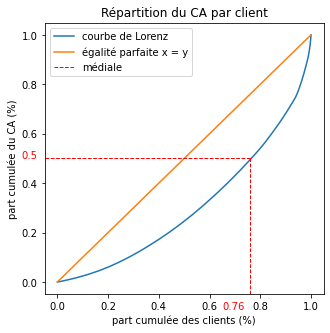

In [40]:
#mesure de concentration (courbes de Lorenz et indice de Gini)

depenses = customers_transactions_products[customers_transactions_products['price'] > 0]
dep = depenses['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()

# La courbe de Lorenz commence à 0
lorenz = np.append([0],lorenz)

# Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n

# surface entre la première bissectrice et le courbe de Lorenz
S = 0.5 - AUC 
gini = 2*S
print("L'indice de Gini est égal à",gini, 'la répartition des commandes par rapport aux catégories de produits est plutot égalitaire ')

#Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
xaxis = np.linspace(0-1/n,1+1/n,n+1)

fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(xaxis,lorenz,drawstyle='steps-post', label = 'courbe de Lorenz')
plt.plot(xaxis,xaxis, label ='égalité parfaite x = y')

plt.axhline(y=0.5, xmin=0, xmax=0.74, c='red', lw=1, linestyle='dashed',label ='médiale')
plt.axvline(x=0.76, ymin=0, ymax=0.5, c='red', lw=1, linestyle='dashed')
ax.text(-0.14, 0.5, "0.5",color='red')
ax.text(0.65, -0.11, "0.76",color='red')


plt.xlabel("part cumulée des clients (%)")
plt.ylabel("part cumulée du CA (%)")
plt.legend()
plt.title('Répartition du CA par client')
plt.show()

*La médiale.Beaucoup moins utilisée que la médiane, elle trouve son utilité lorsqu’un montant global, par exemple une masse salariale, est partagé par un effectif. On s’intéresse cette fois-ci à la valeur médiane de la distribution de la variable et non de l’effectif. Graphiquement, elle correspond à l’ordonnée 0,5 d’une courbe de Lorenz. C’est alors la rémunération du salarié qui permet d’atteindre la moitié de la masse salariale.*

In [41]:
# calcul de la médiale

medial = lorenz[(lorenz < 0.5)].size / lorenz.size
medial

0.7644477564968514

## 4.3.Evolution du CA par mois <a class="anchor" id="4.3"></a>

### Conversion de la colonne categ en Str

In [42]:
customers_transactions_products['categ'] = customers_transactions_products['categ'].astype('str')

customers_transactions_products.head()

,client_id,sex,age,tranche_age,id_prod,date,session_id,price,categ,_merge
0,c_4410,f,55,51-60,0_1455,2021-03,s_9942,8.99,0.0,both
1,c_4410,f,55,51-60,0_1376,2021-09,s_94984,16.24,0.0,both
2,c_4410,f,55,51-60,1_312,2022-01,s_156960,24.56,1.0,both
3,c_4410,f,55,51-60,1_653,2021-07,s_68860,25.99,1.0,both
4,c_4410,f,55,51-60,0_1110,2021-11,s_114715,4.71,0.0,both


### Création de df pour les trois catégories de produits

In [43]:
customers_transactions_products_0 = customers_transactions_products.loc[(customers_transactions_products['categ'] == '0.0')]
customers_transactions_products_1 = customers_transactions_products.loc[(customers_transactions_products['categ'] == '1.0')]
customers_transactions_products_2 = customers_transactions_products.loc[(customers_transactions_products['categ'] == '2.0')]

### Création de table pivot pour obtenir le CA par mois pour chaque catégorie de produits

In [44]:
CA_date_0 = customers_transactions_products_0.pivot_table(values = ['price'], index = ['date'], aggfunc = np.sum, fill_value = 0)
CA_date_1 = customers_transactions_products_1.pivot_table(values = ['price'], index = ['date'], aggfunc = np.sum, fill_value = 0)
CA_date_2 = customers_transactions_products_2.pivot_table(values = ['price'], index = ['date'], aggfunc = np.sum, fill_value = 0)
CA_date = customers_transactions_products.pivot_table(values = ['price'], index = ['date'], aggfunc = np.sum, fill_value = 0)

CA_date_0.reset_index(drop=False)
CA_date_2.reset_index(drop=False)
CA_date_1.reset_index(drop=False)
CA_date.reset_index(drop=False)

,date,price
0,2021-03,479466.967
1,2021-04,473221.733
2,2021-05,489505.672
3,2021-06,481378.446
4,2021-07,480967.521
5,2021-08,479460.127
6,2021-09,502977.862
7,2021-10,319280.466
8,2021-11,513062.322
9,2021-12,523058.186


### Création d'un graphique de l'évolution du CA par mois pour les trois catégories de produits

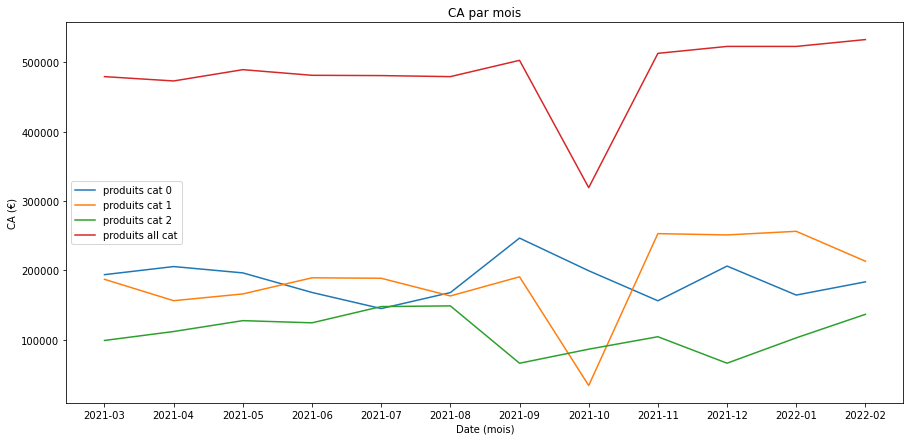

In [45]:
#Je fixe les dimensions de mon grapj
plt.figure(figsize=(15,7))

#Je crée mes courbes
plt.plot(CA_date_0, label = 'produits cat 0')
plt.plot(CA_date_1, label = 'produits cat 1')
plt.plot(CA_date_2, label = 'produits cat 2')
plt.plot(CA_date, label = 'produits all cat')

plt.xlabel('Date (mois)')
plt.ylabel("CA (€)")
plt.title("CA par mois")
plt.legend()

#J'affiche le graph
plt.show()

## *Comme on peut le constater sur le graph ci-dessus, il y a une baisse non négligeable du CA pour les produits de catégorie 1 au mois d'octobre 2021*